# Intro to `pandas`

`pandas` is the `panel data system` ([comments on pronunciation](https://twitter.com/wesmckinn/status/706529447965433856))

## Super-basic intro

Material here includes basic examples taken from the [learn-pandas Bitbucket repo](https://bitbucket.org/hrojas/learn-pandas)

Set up a small `DataFrame` for experimenting. This is artificial, as we will almost always be importing data from some external source ...

In [3]:
import pandas as pd
# The initial set of baby names and birth rates
names = ['Bob','Jessica','Mary','John','Mel']
births = [968, 155, 77, 578, 973]
p = pd.DataFrame({"Name":names,"Count":births})
p    ## notebooks automatically print the *last* result returned in each chunk

,Count,Name
0,968,Bob
1,155,Jessica
2,77,Mary
3,578,John
4,973,Mel


Various ways of indexing. (Note the current example is a little artificial; normally the columns (`Series`) within the data frame will have meaningful names we'll use to index. In addition, the rows may have a **key** assigned that we'll be able to use to (very efficiently) index and sort by row.  For now, though, the column and row indices are just integers ...)

In [25]:
p.loc[2:3,"Count":"Name"]

,Count,Name
2,77,Mary
3,578,John


In [3]:
p["Name"]        ## extract a column = Series (by *name*)
p[2:3]      ## slice one row
p[2:5]      ## slice multiple rows
p[["Name","Count"]]    ## extract multiple columns (data frame)
p.iloc[1,1] ## index with row/column integers like an array

'Jessica'

In [4]:
p["Name"]          ## extract by column index (name)    
p.Name             ## extract as attribute
p.loc[1:2,"Name"]  ## index by *label*, _inclusive_

1    Jessica
2       Mary
Name: Name, dtype: object

Figuring out where I am so I can find the appropriate data file ...

In [5]:
import os
os.getcwd()

'/media/sf_Documents/classes/math1mp3/math1mp/notes'

# Measles data

I downloaded US measles data from [Project Tycho](https://www.tycho.pitt.edu/index.php).

- `read_csv` reads a CSV file as a **data frame**; it automatically interprets the first row as headings
- `df.head()` shows just at the beginning; `df.tail()` shows just the end





In [26]:
v = "./MEASLES_Cases_1909-2001_20150322001618.csv"  ## file name
## read in data from a CSV file ...
p  = pd.read_csv(v,
                 skiprows=2,    ## first two rows are junk (metadata)
                 na_values=["-"] ## missing values
                )     

In [27]:
p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4861 entries, 0 to 4860
Data columns (total 62 columns):
YEAR                        4861 non-null int64
WEEK                        4861 non-null int64
ALABAMA                     2154 non-null float64
ALASKA                      704 non-null float64
AMERICAN SAMOA              3 non-null float64
ARIZONA                     2353 non-null float64
ARKANSAS                    1870 non-null float64
CALIFORNIA                  2997 non-null float64
COLORADO                    2426 non-null float64
CONNECTICUT                 2443 non-null float64
DELAWARE                    1860 non-null float64
DISTRICT OF COLUMBIA        1834 non-null float64
FLORIDA                     2635 non-null float64
GEORGIA                     1863 non-null float64
GUAM                        11 non-null float64
HAWAII                      1022 non-null float64
IDAHO                       2089 non-null float64
ILLINOIS                    2736 non-null float64
IND

`.info()` gives us basic information about a DataFrame (doing a little bit of magic here so we don't have to look at the whole thing, which is long)

In [7]:
%%capture capt
p.info()

In [8]:
print(capt.stdout[0:499]+"...")  # print first 499 characters of output

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4861 entries, 0 to 4860
Data columns (total 62 columns):
YEAR                        4861 non-null int64
WEEK                        4861 non-null int64
ALABAMA                     2154 non-null float64
ALASKA                      704 non-null float64
AMERICAN SAMOA              3 non-null float64
ARIZONA                     2353 non-null float64
ARKANSAS                    1870 non-null float64
CALIFORNIA                  2997 non-null float64
...


In [9]:
p.head()                     ## look at the first few rows
## what would p.iloc[:,0:8].head() do?

,YEAR,WEEK,ALABAMA,ALASKA,AMERICAN SAMOA,ARIZONA,ARKANSAS,CALIFORNIA,COLORADO,CONNECTICUT,...,UPSTATE NEW YORK,UTAH,VERMONT,VIRGIN ISLANDS,VIRGINIA,WASHINGTON,WEST VIRGINIA,WISCONSIN,WYOMING,Unnamed: 61
0,1909,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1909,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1909,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1909,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1909,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since this starts at the beginning, before data is available for most states, most of the cells are filled with `NaN` values (which stands for "not a number"), which `pandas` uses to denote missingness. However, let's just ignore them for now.

Let's be ambitious and plot *all* the data (leaving out the `WEEK` and `YEAR` columns) as a function of time, with a log-scaled y axis (`plt.semilogy()`) ...

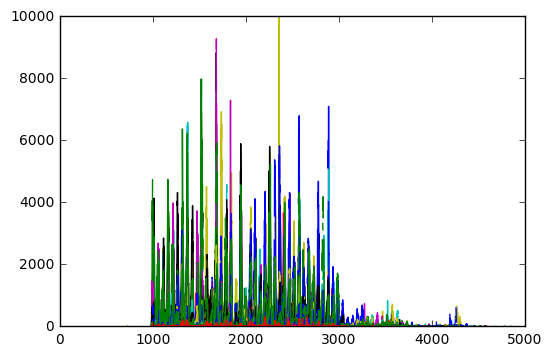

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
all_data = p.loc[:,"ALABAMA":"WYOMING"]
## equivalently: all_data=p.drop(["YEAR","WEEK","Unnamed: 61"])
ax.plot(all_data);
ax.set_ylim((0,10000));


In [ ]:
import numpy as np
a = [1,2,3,np.nan,4]  # make a Series containing an NA value
pd.Series(a).isnull()



We can use `.isnull()` to test whether values are missing or not (testing whether they are equal to the special value `numpy.nan`  **does not work** ...)


In [ ]:
p.ALABAMA.isnull().head()

`.sum()` applied to a logical array counts the number of `True` values ...

In [ ]:
p.ALABAMA.isnull().sum()

Let's say we want to get the number of missing values in *every* column. First we'll use `.isnull()` on the whole DataFrame, then `.sum()` to count the number missing in each column

In [ ]:
all_missing = all_data.isnull()
n_all_miss = all_missing.sum()
n_all_miss.head()

In [ ]:
plt.hist(n_all_miss)  ## do this in a "non-pythonic" way (auto plot setup)
plt.xlabel("number of missing data points");
plt.ylabel("number of columns");


- most common result is about 2500 missing values (16 columns)
- what columns have the largest numbers of missing values?
     - use `sort_values()` to sort; `tail()` to get the last few values
     - [method chaining](https://en.wikipedia.org/wiki/Method_chaining) because we're lazy; string the results rather than setting intermediate values

In [ ]:
n_all_miss.sort_values().tail(6)

We can also do the sum across rows (`axis=1`) and plot the results (number of missing values at each observation time)

In [ ]:
tot_missing = all_missing.sum(axis=1)
plt.plot(tot_missing);

If we try to do any operations with Series with `nan` values in them we're in trouble ...

In [ ]:
sum(p.ALABAMA)

Unfortunately this makes sense. "Anything + `nan`" *should* be `nan`; so should "Anything * `nan`" ... If we just want to get rid of `nan` values we can use `.dropna()` ...

In [ ]:
ALABAMA_nona = p.ALABAMA.dropna()
print(sum(ALABAMA_nona))
## ~ (pronounced "tilde" or "twiddle") is "logical not" for pandas objects ...
## check: total number of obs, number of non-nan obs computed two ways
(len(p.ALABAMA),sum(~p.ALABAMA.isnull()),len(ALABAMA_nona))

Now we might want to figure out how far we have to go in a series to find the first non-`NaN` value ... it's a little sneaky we can use `.argmin()` for this ...

- `.isnull()` turns `nan` values to `True`, which in turn gets translated to 1 when we do a numerical operation
- `.argmin()` returns the index of the **first** occurrence of the minimum value, which is 0 = `False` = not `nan`

In [ ]:
first_alabama = p.ALABAMA.isnull().argmin()
print(first_alabama)

Which time period does this correspond to?

In [ ]:
p.loc[first_alabama,"YEAR":"WEEK"]

Let's make a function to simplify this a bit ...

In [ ]:
def first_val(x):
    return(x.isnull().argmin())

Now we want to run this on all of the data columns (not the `YEAR` and `WEEK` columns). We could use a `for` loop, but it's more compact and `pandas`-ish to use `.apply()` for this.  In general, `.apply()` takes *any* function and runs it on each column of a DataFrame. Analogous to using `axis=0` on `numpy` array methods ...

In [ ]:
all_first_vals = all_data.apply(first_val)
all_first_vals.head()


fWhat if we want a histogram of all of the non-`nan` data?  First we `.unstack()` the data to convert it into a single vector, then we `.dropna()`, then we plot the histogram of $\log(1+x)$ ...

In [ ]:
all_nonna_dat = all_data.unstack().dropna()
plt.hist(all_nonna_dat)
plt.xlabel("number of cases");

Oops, that's not very helpful! Let's try plotting on a log scale instead (we use $\log_10(1+x)$ to deal with periods with zero cases)

In [ ]:
plt.hist(np.log10(1+all_data.unstack().dropna()))
plt.xlabel("log10(1+cases)");

# Data cleaning

Investigate the data. Look at max values for each column ... what are the biggest max values?

In [ ]:
p.max().sort_values().tail()

Seems unlikely for the Virgin Islands to have 53000 cases? 

- Use `plt.scatter` to get points (could also have used `plt.plot(...,"o")`); 
- `p.index` is a special attribute that gives the row numbers of the `DataFrame`
- need to use `[]`-indexing for Virgin Islands because there's a space in the column name (i.e., `p.VIRGIN ISLANDS` won't work)

In [ ]:
plt.scatter(p.index,p.KENTUCKY)
plt.scatter(p.index,p["VIRGIN ISLANDS"],color="red")
plt.scatter(p.index,p.OHIO,color="brown");
plt.ylim(0,55000); ## expand y limits slightly

In [ ]:
bad_ind = p.index[p["VIRGIN ISLANDS"]>40000] # find bad rows
p.loc[bad_ind,"VIRGIN ISLANDS"] = np.nan     # set them to missing
## shortcut
p.loc[p.KENTUCKY>8000,"KENTUCKY"] = np.nan

check again ...

In [ ]:
p.max().sort_values().tail()

Of course this doesn't guarantee that the data are clean. If I were being more thorough I would look through the data one bit at a time, e.g. ...

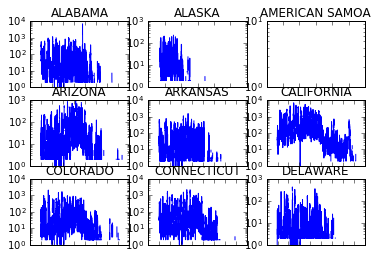

In [14]:
fig = plt.figure()
for i in range(9):
    ax = fig.add_subplot(3,3,i+1)  ## set plot location
    ax.set_title(p.columns[2+i])   ## label with state name
    ax.set_xticklabels([])         ## get rid of x-axis ticks
    ax.semilogy(1+p.iloc[:,2+i]);  ## plot the corresponding column

## Filtering

- Choosing specific rows of a data frame; `&`, `|` ,`~` correspond to `and`, `or`, `not`
(individual elements *must* be in parentheses)
- Example: find records between 1970 and 1972 where Alabama has more than 50 measles cases reported
- For a data range, it would be nice to do `1970 <= p.YEAR <= 1972` but doesn't work ...


In [ ]:
p.ALABAMA[(1970 <= p.YEAR) & (p.YEAR <= 1972) & (p.ALABAMA>50)]               

## Indexing

Use `.index()` to assign an index to the *rows* of a DataFrame; the rows can be used in `.loc()`, will also be included automatically as the x-axis variable in any plots ...

In [ ]:
good_vals = first_val(p.ALABAMA)
## drop first bit with many NAs; keep just state columns
p_short = p.loc[good_vals:,"ALABAMA":"WYOMING"]        
## save date info for future reference
p_dateinfo = p.loc[good_vals:,["YEAR","WEEK"]]       
## assign 'Julian date' as index
p_short.index = p_dateinfo.YEAR+(p_dateinfo.WEEK-1)/52  
## use the same index for both DataFrames
p_dateinfo.index = p_short.index                        
p_short.head()


Now plot results, summed across rows at each week: note that the x-axis now reflects date (not just row number)

In [ ]:
plt.semilogy(p_short.sum(axis=1))
plt.xlabel("Date")
plt.ylabel("Total cases");

## Aggregation

The `.groupby()` and `.aggregate()` functions make it easy to compute averages, means, medians, etc. by any groups you specify in the data.  In this case, for example, we can find the average number of cases by week of year for each state:



In [ ]:
p_week = p_short.groupby(p_dateinfo.WEEK)    ## group by week
p_week_mean = p_week.aggregate(np.mean)      ## compute mean by week
##p_week_mean
plt.plot(p_week_mean);                       ## plot

In [ ]:
biweek = 52*(p_dateinfo.YEAR % 2) + p_dateinfo.WEEK
p_biweek_mean = p_short.groupby(biweek).aggregate(np.mean) 
plt.plot(p_biweek_mean);    


In [ ]:
p_year_mean = p_short.groupby(p_dateinfo.YEAR).aggregate(np.mean) 
plt.semilogy(p_year_mean);    


Still very noisy.  How about a 5-year mean?

In [ ]:
year5 = np.floor(p_dateinfo.YEAR/5)
p_5year_mean = p_short.groupby(year5).aggregate(np.mean) 
plt.semilogy(p_5year_mean);

In [ ]:
p_tot = p_short.sum(axis=1)  ## total cases per week
p_5year = p_tot.groupby(year5)
p_5year.head()

##.aggregate(np.mean) 
##plt.semilogy(p_5year_totmean);

Things get a messy toward the end; the mean keeps declining, but things start to look noisier.  I tried looking at various things (coefficient of variance = std dev/mean, std dev on the log scale ...) but so far I haven't got a statistic that captures my sense of what "noisier" means ...

In [ ]:
p_short_log10 = np.log10(1+p_short)      ## log scale
p_tot_logstd = p_short_log10.std(axis=1)
p_5year_logstd = p_tot_logstd.groupby(year5).aggregate(np.mean) 
plt.semilogy(p_5year_logstd);

## Dates and times

[reference](https://docs.python.org/3.0/library/datetime.html)

- (Another) complex subject. 
- Lots of [possible date formats](https://xkcd.com/1179/)
- Basic idea: something like `%Y-%m-%d`; separators just match whatever's in your data (usually "/" or "-"). Results need to be unambiguous, and ambiguity is dangerous (how is day of month specified?  lower case, capital? etc.)
- `pandas` tries to guess, but you shouldn't let it.


In [ ]:
print(pd.to_datetime("05-01-2004"))
print(pd.to_datetime("05-01-2004",format="%m-%d-%Y"))
print(pd.to_datetime("05-01-2004",format="%d-%m-%Y"))
print(pd.to_datetime("05/01/2004",format="%d/%m/%Y"))




- Time zones and daylight savings time can be a nightmare
- May need to have the right number of digits, especially in the absence of separators:


In [ ]:
print(pd.to_datetime("1212004",format="%m%d%Y"))
print(pd.to_datetime("12012004",format="%m%d%Y"))
print(pd.to_datetime("01212004",format="%m%d%Y"))

For our measles data we have week of year, so things get a little complicated

In [ ]:
yearstr = p_dateinfo.YEAR.apply(format)
weekstr = p_dateinfo.WEEK.apply(format,args=["02"])
datestr = yearstr+"-"+weekstr+"-0"
print(datestr.head())
dateindex = pd.to_datetime(datestr,format="%Y-%U-%w")
dateindex.head()

Once you have converted variables to real date/time formats, you can more easily group by days, weeks, months, ... etc.